In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import json

import sys

sys.path.append("../")

##################################################################
os.environ["TOKENIZERS_PARALLELISM"] = "false"
os.environ["CUDA_VISIBLE_DEVICES"] = "0,1,2,3,4,5,6,7"
##################################################################

import logging
from src.utils import logging_utils
from src.utils import env_utils

logger = logging.getLogger(__name__)

logging.basicConfig(
    level=logging.DEBUG,
    format=logging_utils.DEFAULT_FORMAT,
    datefmt=logging_utils.DEFAULT_DATEFMT,
    stream=sys.stdout,
)

import torch
import transformers

logger.info(f"{torch.__version__=}, {torch.version.cuda=}")
logger.info(
    f"{torch.cuda.is_available()=}, {torch.cuda.device_count()=}, {torch.cuda.get_device_name()=}"
)
logger.info(f"{transformers.__version__=}")

2025-07-15 13:29:37 __main__ INFO     torch.__version__='2.7.0+cu126', torch.version.cuda='12.6'
2025-07-15 13:29:38 __main__ INFO     torch.cuda.is_available()=True, torch.cuda.device_count()=8, torch.cuda.get_device_name()='NVIDIA A100 80GB PCIe'
2025-07-15 13:29:38 __main__ INFO     transformers.__version__='4.51.3'


In [3]:
from src.utils.training_utils import get_device_map

# model_key = "meta-llama/Llama-3.2-3B"
# model_key = "meta-llama/Llama-3.1-8B"
model_key = "meta-llama/Llama-3.3-70B-Instruct"
# model_key = "meta-llama/Llama-3.1-405B-Instruct"

# model_key = "google/gemma-2-9b-it"
# model_key = "google/gemma-3-12b-it"
# model_key = "google/gemma-2-27b-it"

# model_key = "deepseek-ai/DeepSeek-R1-Distill-Llama-8B"

# model_key = "allenai/OLMo-2-1124-7B-Instruct"
# model_key = "allenai/OLMo-7B-0424-hf"

# model_key = "Qwen/Qwen2-7B"
# model_key = "Qwen/Qwen2.5-14B-Instruct"
# model_key = "Qwen/Qwen2.5-32B-Instruct"
# model_key = "Qwen/Qwen2.5-72B-Instruct"

# model_key = "Qwen/Qwen3-1.7B"
# model_key = "Qwen/Qwen3-4B"
# model_key = "Qwen/Qwen3-8B"
# model_key = "Qwen/Qwen3-14B"
# model_key = "Qwen/Qwen3-32B"

# device_map = get_device_map(model_key, 30, n_gpus=8)
# device_map

[2025-07-15 13:29:40,605] [INFO] [real_accelerator.py:239:get_accelerator] Setting ds_accelerator to cuda (auto detect)
2025-07-15 13:29:40 root INFO     gcc -pthread -B /disk/u/arnab/miniconda3/envs/connection/compiler_compat -DNDEBUG -fwrapv -O2 -Wall -fPIC -O2 -isystem /disk/u/arnab/miniconda3/envs/connection/include -fPIC -O2 -isystem /disk/u/arnab/miniconda3/envs/connection/include -fPIC -c /tmp/tmp_xr2meam/test.c -o /tmp/tmp_xr2meam/test.o
2025-07-15 13:29:40 root INFO     gcc -pthread -B /disk/u/arnab/miniconda3/envs/connection/compiler_compat /tmp/tmp_xr2meam/test.o -laio -o /tmp/tmp_xr2meam/a.out


/disk/u/arnab/miniconda3/envs/connection/compiler_compat/ld: cannot find -laio: No such file or directory
collect2: error: ld returned 1 exit status


2025-07-15 13:29:41 root INFO     gcc -pthread -B /disk/u/arnab/miniconda3/envs/connection/compiler_compat -DNDEBUG -fwrapv -O2 -Wall -fPIC -O2 -isystem /disk/u/arnab/miniconda3/envs/connection/include -fPIC -O2 -isystem /disk/u/arnab/miniconda3/envs/connection/include -fPIC -c /tmp/tmpms5hzkco/test.c -o /tmp/tmpms5hzkco/test.o
2025-07-15 13:29:41 root INFO     gcc -pthread -B /disk/u/arnab/miniconda3/envs/connection/compiler_compat /tmp/tmpms5hzkco/test.o -L/usr -L/usr/lib64 -lcufile -o /tmp/tmpms5hzkco/a.out


/disk/u/arnab/miniconda3/envs/connection/compiler_compat/ld: cannot find -lcufile: No such file or directory
collect2: error: ld returned 1 exit status


2025-07-15 13:29:42 git.cmd DEBUG    Popen(['git', 'version'], cwd=/disk/u/arnab/Codes/Projects/retrieval/notebooks, stdin=None, shell=False, universal_newlines=False)
2025-07-15 13:29:42 git.cmd DEBUG    Popen(['git', 'version'], cwd=/disk/u/arnab/Codes/Projects/retrieval/notebooks, stdin=None, shell=False, universal_newlines=False)
2025-07-15 13:29:42 wandb.docker.auth DEBUG    Trying paths: ['/disk/u/arnab/.docker/config.json', '/disk/u/arnab/.dockercfg']
2025-07-15 13:29:42 wandb.docker.auth DEBUG    No config file found


In [4]:
# os.environ["BNB_CUDA_VERSION"] = "124"
# ! echo $BNB_CUDA_VERSION
# ! python -m bitsandbytes

In [5]:
from src.models import ModelandTokenizer

# from transformers import BitsAndBytesConfig

mt = ModelandTokenizer(
    model_key=model_key,
    torch_dtype=torch.bfloat16,
    # device_map=device_map,
    device_map="auto",
    # quantization_config = BitsAndBytesConfig(
    #     # load_in_4bit=True
    #     load_in_8bit=True
    # )
)

2025-07-15 13:29:43 src.models WARNING  meta-llama/Llama-3.3-70B-Instruct not found in /disk/u/arnab/Codes/Models
If not found in cache, model will be downloaded from HuggingFace to cache directory
2025-07-15 13:29:43 urllib3.connectionpool DEBUG    Starting new HTTPS connection (1): huggingface.co:443


2025-07-15 13:29:43 urllib3.connectionpool DEBUG    https://huggingface.co:443 "HEAD /meta-llama/Llama-3.3-70B-Instruct/resolve/main/config.json HTTP/1.1" 200 0
2025-07-15 13:29:43 urllib3.connectionpool DEBUG    https://huggingface.co:443 "HEAD /meta-llama/Llama-3.3-70B-Instruct/resolve/main/tokenizer_config.json HTTP/1.1" 200 0


Loading checkpoint shards:   0%|          | 0/30 [00:00<?, ?it/s]

2025-07-15 13:30:34 urllib3.connectionpool DEBUG    https://huggingface.co:443 "HEAD /meta-llama/Llama-3.3-70B-Instruct/resolve/main/generation_config.json HTTP/1.1" 200 0
2025-07-15 13:30:34 src.models INFO     loaded model <meta-llama/Llama-3.3-70B-Instruct> | size: 134570.516 MB | dtype: torch.bfloat16 | device: cuda:0


In [6]:
from src.functional import free_gpu_cache

# SYNTH_DATASET = "icosahedron_1"
SYNTH_DATASET = "64"

checkpoint_path = os.path.join(
    env_utils.DEFAULT_RESULTS_DIR,
    "trained_params",
    f"{SYNTH_DATASET}",
    "_full__clamp=0.001",
    model_key.split("/")[-1],
)

version = "epoch_1"
# version = "final_model"

checkpoint_path = os.path.join(env_utils.DEFAULT_RESULTS_DIR, checkpoint_path, version)

print(os.listdir(checkpoint_path))

checkpoint_path = os.path.join(checkpoint_path, "trainable_params.pt")

loaded_deltas = torch.load(checkpoint_path, map_location="cpu")
# loaded_deltas

free_gpu_cache()


d = loaded_deltas["model<>layers<>10<>mlp<>gate_proj"]
d.abs().max()

['trainable_params.pt']


tensor(0.0010, dtype=torch.bfloat16, grad_fn=<MaxBackward1>)

In [7]:
from src.utils.training_utils import TrainableLM_delta, TrainableLM_LoRA

#################################################
Trainable_CLS = TrainableLM_delta
# Trainable_CLS = TrainableLM_LoRA
#################################################

Trainable_CLS.fuse_with_model(mt._model, loaded_deltas)

2025-07-15 13:30:53 src.utils.training_utils DEBUG    module_name='model.layers.0.mlp.gate_proj' | param_delta.shape=torch.Size([28672, 8192])
2025-07-15 13:30:53 src.utils.training_utils DEBUG    module_name='model.layers.0.mlp.up_proj' | param_delta.shape=torch.Size([28672, 8192])
2025-07-15 13:30:53 src.utils.training_utils DEBUG    module_name='model.layers.0.mlp.down_proj' | param_delta.shape=torch.Size([8192, 28672])
2025-07-15 13:30:53 src.utils.training_utils DEBUG    module_name='model.layers.1.mlp.gate_proj' | param_delta.shape=torch.Size([28672, 8192])
2025-07-15 13:30:53 src.utils.training_utils DEBUG    module_name='model.layers.1.mlp.up_proj' | param_delta.shape=torch.Size([28672, 8192])
2025-07-15 13:30:53 src.utils.training_utils DEBUG    module_name='model.layers.1.mlp.down_proj' | param_delta.shape=torch.Size([8192, 28672])
2025-07-15 13:30:53 src.utils.training_utils DEBUG    module_name='model.layers.2.mlp.gate_proj' | param_delta.shape=torch.Size([28672, 8192])
202

In [240]:
people_by_prof = {
    "actor": [
        "Scarlett Johansson",
        "Natalie Portman",
        "Meryl Streep",
        "Jennifer Lawrence",
        "Angelina Jolie",
        "Robert De Niro",
        "Tom Hanks",
        "Leonardo DiCaprio",
        "Brad Pitt",
        "Denzel Washington",
        "Julia Roberts",
        "Will Smith",
    ],
    "physicist": [
        "Albert Einstein",
        "Stephen Hawking",
        "Marie Curie",
        "Richard Feynman",
        "Niels Bohr",
        "Isaac Newton",
        "Galileo Galilei",
        "Werner Heisenberg",
        "Erwin Schrödinger",
        "Max Planck",
        "Enrico Fermi",
        "Robert Oppenheimer",
    ],
    "basketball player": [
        "Michael Jordan",
        "LeBron James",
        "Kobe Bryant",
        "Magic Johnson",
        "Larry Bird",
        "Shaquille O'Neal",
        "Tim Duncan",
        "Kareem Abdul-Jabbar",
        "Wilt Chamberlain",
        "Bill Russell",
        "Kevin Durant",
        "Stephen Curry",
    ],
    "entrepreneur": [
        "Jack Ma",
        "Elon Musk",
        "Bill Gates",
        "Steve Jobs",
        "Jeff Bezos",
        "Mark Zuckerberg",
        "Warren Buffett",
        "Richard Branson",
        "Larry Page",
        "Sergey Brin",
        "Henry Ford",
    ],
    "singer": [
        "Taylor Swift",
        "Adele",
        "Beyoncé",
        "Bruno Mars",
        "Ed Sheeran",
        "Lady Gaga",
        "Rihanna",
        "Justin Bieber",
        "Katy Perry",
        "Whitney Houston",
        "Elvis Presley",
        "Michael Jackson",
        "Madonna",
        "Frank Sinatra",
        "Freddie Mercury",
    ],
    "director": [
        "Steven Spielberg",
        "Christopher Nolan",
        "Martin Scorsese",
        "Quentin Tarantino",
        "Alfred Hitchcock",
        "Stanley Kubrick",
        "Francis Ford Coppola",
        "James Cameron",
        "Woody Allen",
        "Ridley Scott",
        "Clint Eastwood",
        "Tim Burton",
    ],
    "chef": [
        "Gordon Ramsay",
        "Julia Child",
        "Anthony Bourdain",
        "Emeril Lagasse",
        "Wolfgang Puck",
        "Jamie Oliver",
        "Bobby Flay",
        "Rachael Ray",
        "Alain Ducasse",
        "Marco Pierre White",
        "Masaharu Morimoto",
        "Guy Fieri",
    ],
    "tennis player": [
        "Serena Williams",
        "Roger Federer",
        "Rafael Nadal",
        "Novak Djokovic",
        "Steffi Graf",
        "Pete Sampras",
        "Andre Agassi",
        "Martina Navratilova",
        "Björn Borg",
        "John McEnroe",
        "Venus Williams",
        "Andy Murray",
    ],
    "comedian": [
        "Dave Chappelle",
        "Jerry Seinfeld",
        "George Carlin",
        "Eddie Murphy",
        "Louis C.K.",
        "Richard Pryor",
        "Steve Martin",
        "Jon Stewart",
    ],
    "author": [
        "Stephen King",
        "J.K. Rowling",
        "Ernest Hemingway",
        "Maya Angelou",
        "Mark Twain",
        "William Shakespeare",
        "Charles Dickens",
        "Agatha Christie",
        "George Orwell",
        "Jane Austen",
        "Gabriel García Márquez",
        "Leo Tolstoy",
    ],
    "american football": [
        "Tom Brady",
        "Peyton Manning",
        "Joe Montana",
        "Aaron Rodgers",
        "Brett Favre",
        "Jerry Rice",
        "Walter Payton",
        "Johnny Unitas",
        "Lawrence Taylor",
        "Jim Brown",
        "Barry Sanders",
        "Emmitt Smith",
    ],
    "soccer player": [
        "Lionel Messi",
        "Cristiano Ronaldo",
        "Pelé",
        "Diego Maradona",
        "Zinedine Zidane",
        "Ronaldinho",
        "Johan Cruyff",
        "Franz Beckenbauer",
        "Thierry Henry",
        "Ronaldo Nazário",
        "David Beckham",
        "Kylian Mbappé",
    ],
    "painter": [
        "Michelangelo",
        "Vincent van Gogh",
        "Pablo Picasso",
        "Leonardo da Vinci",
        "Claude Monet",
        "Rembrandt",
        "Salvador Dalí",
        "Andy Warhol",
        "Frida Kahlo",
        "Jackson Pollock",
        "Johannes Vermeer",
        "Henri Matisse",
    ],
}

list(people_by_prof.keys())

['actor',
 'physicist',
 'basketball player',
 'entrepreneur',
 'singer',
 'director',
 'chef',
 'tennis player',
 'comedian',
 'author',
 'american football',
 'soccer player',
 'painter']

In [241]:
def get_first_token_id(name, prefix=" "):
    """Get the first token ID for a given name."""
    return mt.tokenizer(
        prefix + name, return_tensors="pt", add_special_tokens=False
    ).input_ids[0][0].item()

class KeyedSet:
    def __init__(self, items):
        self._dict = {get_first_token_id(item): item for item in items}

    def __sub__(self, other):
        diff_keys = set(self._dict.keys()) - set(other._dict.keys())
        values = [self._dict[k] for k in diff_keys]
        return KeyedSet(values)
    
    @property
    def keys(self):
        return list(self._dict.keys())
    @property
    def values(self):
        return list(self._dict.values())
    
    def show(self):
        for k, v in self._dict.items():
            print(f"{k}[\"{mt.tokenizer.decode(k)}\"]: {v}")


people_by_prof_set = {
    k: KeyedSet(v)
    for k, v in people_by_prof.items()
}

people_by_prof_set["actor"].show()
print("-" * 50)
people_by_prof_set["chef"].show()
print("-" * 50)
(people_by_prof_set["actor"] - people_by_prof_set["chef"]).show()

96572[" Scarlett"]: Scarlett Johansson
64120[" Natalie"]: Natalie Portman
386[" M"]: Meryl Streep
30750[" Jennifer"]: Jennifer Lawrence
23950[" Angel"]: Angelina Jolie
8563[" Robert"]: Robert De Niro
8529[" Tom"]: Tom Hanks
66486[" Leonardo"]: Leonardo DiCaprio
17478[" Brad"]: Brad Pitt
9973[" Den"]: Denzel Washington
40394[" Julia"]: Julia Roberts
4946[" Will"]: Will Smith
--------------------------------------------------
26952[" Gordon"]: Gordon Ramsay
40394[" Julia"]: Julia Child
21353[" Anthony"]: Anthony Bourdain
21185[" Emer"]: Emeril Lagasse
87598[" Wolfgang"]: Wolfgang Puck
36857[" Jamie"]: Jamie Oliver
38481[" Bobby"]: Bobby Flay
84485[" Rach"]: Rachael Ray
1708[" Al"]: Alain Ducasse
35281[" Marco"]: Marco Pierre White
20459[" Mas"]: Masaharu Morimoto
26340[" Guy"]: Guy Fieri
--------------------------------------------------
386[" M"]: Meryl Streep
17478[" Brad"]: Brad Pitt
23950[" Angel"]: Angelina Jolie
8529[" Tom"]: Tom Hanks
4946[" Will"]: Will Smith
8563[" Robert"]: Rob

In [ ]:
from src.functional import generate_with_patch
import random

# SELECT ONE TASK
prompt_template = """Which person from the following list has the profession in common with {}?
{}.
Ans:"""

# pivot_subj = "Celine Dion"
# entity_list = ["Ryan Reynolds", "Claude Monet", "Albert Einstein", "Taylor Swift", "Pablo Picasso", "Barack Obama", "J.K. Rowling", "Pierre Dubois"]

# pivot_subj = "Jim Henson"
# entity_list = [
#     "Celine Dion",
#     "Taylor Swift",
#     "Ryan Reynolds",
#     "Claude Monet",
#     "Albert Einstein",
#     "Pablo Picasso",
#     "Bil Baird",
#     "Barack Obama",
#     "J.K. Rowling",
#     "Pierre Dubois",
#     "Sachin Tendulkar",
#     "Hugh Jackman",
#     "Jackie Chan",
#     "Jet Li",
#     "Diego Maradona",
#     "Lionel Messi",
#     "Frida Kahlo",
#     "Diego Rivera",
# ]

# patch_subj = "Justin Trudeau"
# patch_obj = "Barack Obama"
# patch_obj_pos = 2
# patch_subj_distractor = "Emmanuel Macron"
# patch_obj, patch_subj_distractor = patch_subj_distractor, patch_obj

# patch_subj = "Hugh Jackman"
# patch_subj = "Carl Sagan"
# patch_subj = "Ricky Ponting"
# patch_subj = "George R. R. Martin"

# patch_subj = "Celine Dion"
# patch_obj = "Taylor Swift"
# patch_subj_distractor = "Adele Laurie Blue Adkins"

# patch_distractors = [
#     "Robin Hobb",
#     "Michael Jordan",
#     "Tom Cruise",
#     "Albert Einstein",
#     "Brian Lara",
# ]

######################################################################
patch_prof = "actor"
patch_obj_pos = 1
n_distractors = 5
######################################################################

patch_subj = random.choice(people_by_prof_set[patch_prof].values)
patch_obj = random.choice(
    (people_by_prof_set[patch_prof] - KeyedSet([patch_subj])).values
)
patch_subj_distractor = random.choice(
    (people_by_prof_set[patch_prof] - KeyedSet([patch_obj, patch_subj])).values
)


patch_distractors = []
other_profs = random.choices(
    list(set(people_by_prof.keys()) - {patch_prof}), k=n_distractors
)

for prof in other_profs:
    patch_distractors.append(random.choice(people_by_prof[prof]))

patch_list = (
    patch_distractors[:patch_obj_pos] + [patch_obj] + patch_distractors[patch_obj_pos:]
)
obj_corrupt = get_first_token_id(patch_obj)
print(f'{obj_corrupt=} >> "{mt.tokenizer.decode(obj_corrupt)}", {patch_obj=}')

obj_patch_subj = get_first_token_id(patch_subj_distractor)
print(f'{obj_patch_subj=} >> "{mt.tokenizer.decode(obj_patch_subj)}", {patch_subj_distractor=}')

patch_prompt = prompt_template.format(patch_subj, ", ".join(patch_list))
print(f'"{patch_prompt}"')

patch_gen = generate_with_patch(
    mt=mt,
    inputs=patch_prompt,
    max_new_tokens=30,
    n_gen_per_prompt=1,
    do_sample=False,
    remove_prefix=True,
)[0]
print(f"{patch_gen}")

obj_corrupt=40394 >> " Julia", patch_obj='Julia Roberts'
obj_patch_subj=4946 >> " Will", patch_subj_distractor='Will Smith'
"Which person from the following list has the profession in common with Robert De Niro?
Madonna, Julia Roberts, Franz Beckenbauer, Agatha Christie, Freddie Mercury, Madonna.
Ans:"
 Julia Roberts. Both Julia Roberts and Robert De Niro are actors. The others are a singer, a footballer, a writer and a singer respectively


In [243]:
test_prompt = """Which person from the following list has the profession in common with Rembrandt?
Madonna, Julia Roberts, Franz Beckenbauer, Agatha Christie, Freddie Mercury, Madonna.
Ans:"""

test_gen = generate_with_patch(
    mt=mt,
    inputs=test_prompt,
    max_new_tokens=30,
    n_gen_per_prompt=1,
    do_sample=False,
    remove_prefix=True,
)[0]
print(f"{test_gen}")

/disk/u/arnab/miniconda3/envs/connection/lib/python3.11/site-packages/transformers/generation/configuration_utils.py:631: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.6` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/disk/u/arnab/miniconda3/envs/connection/lib/python3.11/site-packages/transformers/generation/configuration_utils.py:636: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(


 Agatha Christie.
The common profession is that of an artist. Agatha Christie was a writer, and Rembrandt was a painter. The others


In [236]:
from src.functional import get_hs, interpret_logits

locations = [(layer_name, -1) for layer_name in mt.layer_names]
logit_location = (mt.lm_head_name, -1)


patch_hs = get_hs(
    mt = mt,
    input=patch_prompt,
    locations=locations + [logit_location],
    return_dict=True
)

logit = patch_hs[logit_location]
interpret_logits(
    logits = logit,
    tokenizer=mt
)

[PredictedToken(token=' Julia', prob=0.71484375, logit=19.25, token_id=40394, metadata=None),
 PredictedToken(token=' None', prob=0.0751953125, logit=17.0, token_id=2290, metadata=None),
 PredictedToken(token=' Robert', prob=0.05859375, logit=16.75, token_id=8563, metadata=None),
 PredictedToken(token=' Madonna', prob=0.0260009765625, logit=15.9375, token_id=81669, metadata=None),
 PredictedToken(token=' The', prob=0.02294921875, logit=15.8125, token_id=578, metadata=None)]

In [237]:
import random

# clean_subj = "Hugh Jackman"
# clean_obj = "Ryan Reynolds"
# clean_subj = "Andy Murray"
# clean_obj = "Serena Williams"

# clean_distractors = [
#     "Issac Newton",
#     "Rowan Atkinson",
#     "Neil Armstrong",
#     "Tolkien",
#     "Marie Curie",
# ]

##############################################################
clean_prof = "tennis player"
clean_obj_pos = 5
##############################################################

clean_subj = random.choice(people_by_prof_set[clean_prof].values)
clean_obj = random.choice(
    (people_by_prof_set[clean_prof] - KeyedSet([clean_subj])).values
)
clean_distractors = []
other_profs = random.choices(
    list(set(people_by_prof.keys()) - {clean_prof, patch_prof}),
    k=n_distractors - 1,
)

for prof in other_profs:
    clean_distractors.append(
        random.choice((people_by_prof_set[prof] - KeyedSet(patch_distractors)).values)
    )

clean_distractors += [patch_subj_distractor]
random.shuffle(clean_distractors)

clean_list = (
    clean_distractors[:clean_obj_pos] + [clean_obj] + clean_distractors[clean_obj_pos:]
)

obj_pointer = clean_list[patch_obj_pos]

# make sure that obj_pointer and patch_obj are different
while obj_pointer == patch_obj:
    other_idx = random.choice(
        set(list(range(len(clean_list))) - {patch_obj_pos, clean_obj_pos})
    )
    clean_list[patch_obj_pos], clean_list[other_idx] = (
        clean_list[other_idx],
        clean_list[patch_obj_pos],
    )

obj_pointer = get_first_token_id(obj_pointer)
print(f'{obj_pointer=} >> "{mt.tokenizer.decode(obj_pointer)}"')

clean_prompt = prompt_template.format(clean_subj, ", ".join(clean_list))
print(clean_prompt)

obj_clean = get_first_token_id(clean_obj)
print(f'{obj_clean=} >> "{mt.tokenizer.decode(obj_clean)}"')

obj_rand = random.choice(
    list(
        set(clean_distractors)
        - {clean_obj, patch_subj_distractor, clean_list[patch_obj_pos]}
    )
)
obj_rand = get_first_token_id(obj_rand)
print(f'{obj_rand=} >> "{mt.tokenizer.decode(obj_rand)}"')

clean_hs = get_hs(
    mt=mt,
    input=clean_prompt,
    locations=locations + [logit_location],
    return_dict=True,
)
logit = clean_hs[logit_location]
interpret_logits(logits=logit, tokenizer=mt)

obj_pointer=35407 >> " Vincent"
Which person from the following list has the profession in common with Venus Williams?
Werner Heisenberg, Vincent van Gogh, Will Smith, Ronaldo Nazário, Andy Warhol, Björn Borg.
Ans:
obj_clean=69841 >> " Bj"
obj_rand=65515 >> " Ronaldo"


[PredictedToken(token=' Bj', prob=0.66796875, logit=19.0, token_id=69841, metadata=None),
 PredictedToken(token=' The', prob=0.0703125, logit=16.75, token_id=578, metadata=None),
 PredictedToken(token=' Ronaldo', prob=0.062255859375, logit=16.625, token_id=65515, metadata=None),
 PredictedToken(token=' None', prob=0.054931640625, logit=16.5, token_id=2290, metadata=None),
 PredictedToken(token=' Will', prob=0.01226806640625, logit=15.0, token_id=4946, metadata=None)]

In [238]:
from src.functional import PatchSpec

patching_results = {}
for layer_name in mt.layer_names[::1]:
    int_logit = get_hs(
        mt = mt,
        input = clean_prompt,
        patches = [PatchSpec(
            location=(layer_name, -1),
            patch=patch_hs[(layer_name, -1)],
            strategy="replace"
        )],
        locations = [logit_location],
        return_dict=False
    ).squeeze(0)

    pred, track = interpret_logits(
        logits=int_logit,
        tokenizer=mt,
        interested_tokens=[obj_clean, obj_pointer, obj_corrupt, obj_patch_subj, obj_rand],
    )
    patching_results[layer_name] = {
        "pred": pred,
        "track": track
    }
    print(f'{layer_name}: {[str(p) for p in pred]}, | track: {track}')

model.layers.0: ['" Bj"[69841] (p=0.668, logit=19.000)', '" The"[578] (p=0.070, logit=16.750)', '" Ronaldo"[65515] (p=0.062, logit=16.625)', '" None"[2290] (p=0.055, logit=16.500)', '" Will"[4946] (p=0.012, logit=15.000)'], | track: {69841: (1, PredictedToken(token=' Bj', prob=0.66796875, logit=19.0, token_id=69841, metadata=None)), 65515: (3, PredictedToken(token=' Ronaldo', prob=0.062255859375, logit=16.625, token_id=65515, metadata=None)), 4946: (5, PredictedToken(token=' Will', prob=0.01226806640625, logit=15.0, token_id=4946, metadata=None)), 35407: (43, PredictedToken(token=' Vincent', prob=0.00057220458984375, logit=11.9375, token_id=35407, metadata=None)), 40394: (1034, PredictedToken(token=' Julia', prob=3.874301910400391e-06, logit=6.9375, token_id=40394, metadata=None))}
model.layers.1: ['" Bj"[69841] (p=0.660, logit=19.000)', '" The"[578] (p=0.079, logit=16.875)', '" Ronaldo"[65515] (p=0.062, logit=16.625)', '" None"[2290] (p=0.054, logit=16.500)', '" Will"[4946] (p=0.012, 

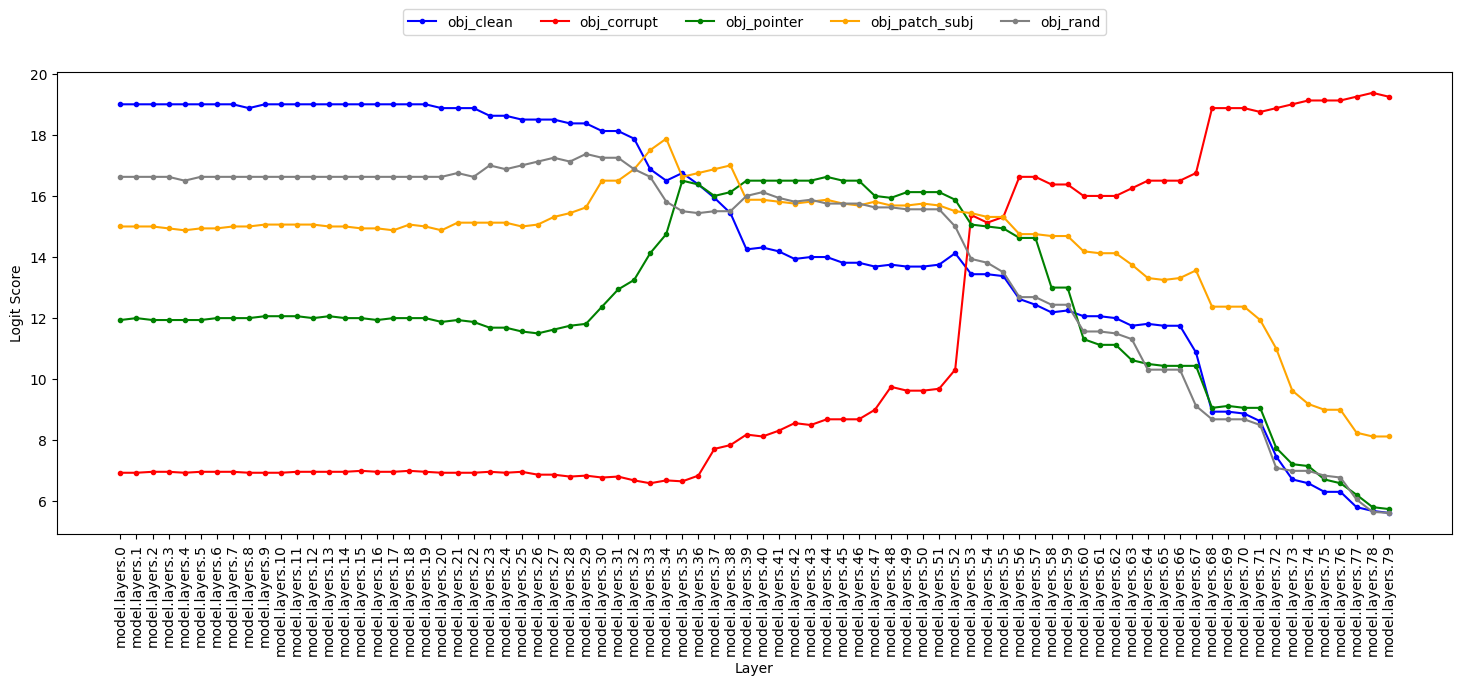

In [239]:
from matplotlib import pyplot as plt

scores = {
    "obj_clean": [],
    "obj_corrupt": [],
    "obj_pointer": [],
    "obj_patch_subj": [],
    "obj_rand": [],
}

colors = {
    "obj_clean": "blue",
    "obj_pointer": "green",
    "obj_corrupt": "red",
    "obj_patch_subj": "orange",
    "obj_rand": "gray",
}

for layer_name, result in patching_results.items():
    scores["obj_clean"].append(result["track"][obj_clean][1].logit)
    scores["obj_pointer"].append(result["track"][obj_pointer][1].logit)
    scores["obj_corrupt"].append(result["track"][obj_corrupt][1].logit)
    scores["obj_patch_subj"].append(result["track"][obj_patch_subj][1].logit)
    scores["obj_rand"].append(result["track"][obj_rand][1].logit)

xkeys = list(patching_results.keys())
plt.figure(figsize=(18, 6))

for key in scores:
    plt.plot(xkeys, scores[key], label=key, marker='o', markersize=3, color=colors[key])


plt.xticks(rotation=90)
plt.xlabel("Layer")
plt.ylabel("Logit Score")

plt.legend(ncols=len(scores), loc="upper center", bbox_to_anchor=(0.5, 1.15))

plt.show()

In [12]:
# Exclusion
prompt_template = """Which person from the following list does not have the profession in common with {}?
{}.
Ans:"""

# pivot_subj = "Hugh Jackman"
# entity_list = [
#     "Tom Cruise",
#     "Brad Pitt",
#     "Ryan Reynolds",
#     "Celine Dion",
#     "Tom Hanks",
#     "Scarlett Johansson",
# ]

# pivot_subj = "Michael Jordan"
# entity_list = [
#     "Sachin Tendulkar",
#     "Roger Federer",
#     "Lionel Messi",
#     "Kobe Bryant",
#     "Tom Brady",
#     "Hugh Jackman",
#     "Serena Williams",
#     "Mohamed Salah",
#     "Tiger Woods",
#     "Jesse Owens",
#     "Cristiano Ronaldo",
#     "Mike Tyson",
#     "Usain Bolt",
#     "Michael Phelps",
#     "LeBron James",
# ]

# prompt_template = """Which person from the following list didn't graduate from the same school as {}
# {}.
# Ans:"""

# pivot_subj = "Steve Martin"
# entity_list = [
#    "Francis Ford Coppola",
#    "Kareem Abdul-Jabbar",
#    "Jackie Robinson",
#    "Jim Morrison",
#    "Susan Wojcicki",
#    "Carol Burnett",
#    "George Lucas",
#    "Arthur Ashe",
#    "Mayim Bialik",
#    "Troy Aikman",
#    "Randy Schekman"
# ]

prompt_template = """Which object in this list is does not share the same color as {}?
{}.
Ans:"""

# pivot_subj = "banana"
# entity_list = ["pineapple", "sunflower", "canary", "blood", "mustard", "taxi", "corn"]
pivot_subj = "fire extinguisher"
patch_list = ["stop sign", "apple", "tomato", "snow", "traffic light", "fire truck"]


prompt = prompt_template.format(pivot_subj, ",".join(patch_list))
generate_with_patch(
    mt=mt,
    inputs=prompt,
    max_new_tokens=30,
    n_gen_per_prompt=1,
    do_sample=False,
    remove_prefix=True,
)

/disk/u/arnab/miniconda3/envs/connection/lib/python3.11/site-packages/transformers/generation/configuration_utils.py:631: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.6` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/disk/u/arnab/miniconda3/envs/connection/lib/python3.11/site-packages/transformers/generation/configuration_utils.py:636: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(


[' snow.\nThe color of fire extinguisher is red. The objects in the list that are red are stop sign, apple, tomato, and fire truck']

In [13]:
# NOVELTY: Find the odd one out

prompt_template = """Which person from the following list is different from the others?
{}.
Ans:"""

patch_list = []